<a href="https://colab.research.google.com/github/mttcrn/AI-things/blob/main/Deep%20Learning/03-LeNet300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center>MNIST classification using <i>LeNet300</i></center></h2>


# Importing Keras

In [ ]:
# Importing the Keras 2.x main module relying on tensorflow 2.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.9.2
Using keras version 2.9.0


# Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets
Verify the amount of system memory available before and after loading the dataset.

In [ ]:
# The MNSIT dataset is ready to be imported from Keras into RAM
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Using the pyplot package, visualize the fist sample of the training set

Label for the first train image is: 5


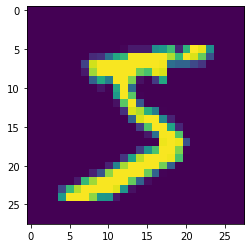

In [ ]:
# Let us visualize the FIRST training sample using the Gnuplot library
from matplotlib import pyplot as plt

print("Label for the first train image is: " + str(train_labels[0]))
plt.imshow(train_images[0])

Turn train and test labels to one-hot encoding

In [ ]:
from keras.utils.np_utils import to_categorical
# It transform the labels vector in a matrix with the ONE-HOT encoding

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Reshape train and test images so that they follow the NWHC ordering required by the TF backend.
Then, after casting the pixels to floats, normalize the images so that they have zero-mean and unitary deviation

In [ ]:
# Reshape to proper images with 1 color channel according to backend scheme that is in 4D
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
print(test_images.shape)

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now lets normalize the images so that they have zero mean and standard deviation
train_images = (train_images - train_images.mean()) / (train_images.std())
test_images = (test_images - test_images.mean()) / (test_images.std())

(10000, 28, 28, 1)


# Defining the neural network architecture (i.e., the network model)

Create a LeNet300-like fully connected network taking in input the images as vectors of pixels and suitable to classify each image across 10 different classes. For this first implementation of the network, use only sigmoid activations in the hidden layer. Which activation function shall be used for the output layer ?

In [ ]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


input_shape = (img_rows, img_cols, 1)
output_shape = 10

model = Sequential()

model.add(Flatten(input_shape = input_shape))

# Hidden layers
# 1st layer
model.add(Dense(300))
model.add(Activation('sigmoid'))
# 2nd layer
model.add(Dense(100))
model.add(Activation('sigmoid'))
# output layer
model.add(Dense(output_shape))
model.add(Activation('softmax')) #activation function for classification

Instantiate a SGD optimizer with a tentative LR of $10^{-4}$ and using the appropriate loss function and compile the model.

In [ ]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
opt = tf.keras.optimizers.SGD(lr=1e-3)

# Compiling a model in Keras amounts to associating the optimizer to a model
# with an appropriate loss function
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Look at the defined model topology
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 activation_3 (Activation)   (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
 activation_5 (Activation)   (None, 10)               

# Training the network

Train the model for 10 epochs using the fit() method, without batch training initially validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable fit() verbose mode for interactive output.

In [ ]:
# This is where the actual training-testing happens
batch_size = 128
# Number of epochs we want to train
epochs = 100

n_train_samples = 60000
history = model.fit(train_images[:n_train_samples], train_labels[:n_train_samples],
          batch_size=batch_size, epochs=epochs,
          verbose=1, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/100
469/469 [==============================] - 6s 7ms/step - loss: 2.3256 - accuracy: 0.1274 - val_loss: 2.2710 - val_accuracy: 0.1574
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 2.2446 - accuracy: 0.2355 - val_loss: 2.2218 - val_accuracy: 0.3078
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 2.2012 - accuracy: 0.3723 - val_loss: 2.1793 - val_accuracy: 0.4208
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 2.1593 - accuracy: 0.4573 - val_loss: 2.1367 - val_accuracy: 0.4994
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 2.1168 - accuracy: 0.5216 - val_loss: 2.0932 - val_accuracy: 0.5426
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 2.0733 - accuracy: 0.5597 - val_loss: 2.0485 - val_accuracy: 0.5764
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 2.0285 - accuracy: 0.5868 - val_loss: 2.0025 - val_accuracy: 0.6080

# Visualizing the network performance
Visualize the training history using the pyplot package: plot in one graph the train and vaidation loss functions, in another graph the train and validation accuracy. By comparing the training the testing curves, what can we conclude about the quality of the training ?

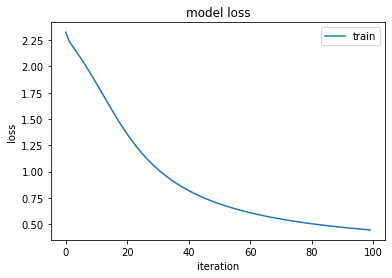

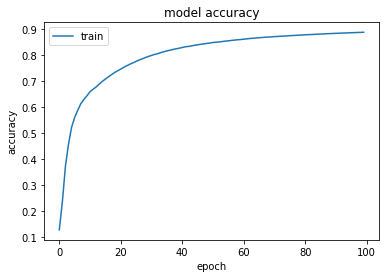

In [ ]:
# We now want to plot the train and validation loss functions and accuracy curves
#print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


# Computing the confusion matrix
The confusion matrix allows to analyze the trained network performance on a per-class basis

In [ ]:
# Example of a confusion matrix using sklearn.metrics
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_images)

matrix = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
print (matrix)

313/313 [==============================] - 1s 2ms/step
[[ 954    0    1    1    1    8   12    1    2    0]
 [   0 1104    2    2    1    1    4    2   19    0]
 [  12   16  887   16   21    1   23   21   34    1]
 [   4    3   20  895    1   34    3   24   20    6]
 [   1    4    4    0  910    2   15    1    3   42]
 [  24    8    4   59   13  710   28   12   23   11]
 [  22    3    9    2   12   23  883    2    2    0]
 [   3   24   27    3    9    1    1  919    4   37]
 [  10   16   13   33   11   33   18   10  807   23]
 [  16    8    5    9   60   13    1   29    6  862]]


# Experiments

Note down the performance of the trained network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the trained network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the batch size (from purely stochastic case) and compare performance with reference.
*  Experiment gradually increasing the learning rate starting from $10^{-4}$ and find a reasonable learning rate value the network can tolerate without diverging.
*  Experiment replacing the sigmoid activations with Relus and note what happens.




